In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [176]:
# import data
ess = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
#ess = ess.dropna()
#print(ess.isnull().values.any())
ess.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


__1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.__

In [177]:
trust = ess['ppltrst'].groupby([ess['cntry'], ess['year']])
trust.describe()

count      mean       std  min   25%  50%  75%   max
cntry year                                                       
CH    6      773.0  5.677878  2.130701  0.0  4.00  6.0  7.0  10.0
      7      773.0  5.751617  2.143888  0.0  5.00  6.0  7.0  10.0
CZ    6      651.0  4.362519  2.409738  0.0  3.00  4.0  6.0  10.0
      7      657.0  4.424658  2.305389  0.0  3.00  5.0  6.0  10.0
DE    6       14.0  5.214286  1.528125  3.0  4.25  5.0  6.5   8.0
      7       14.0  5.357143  2.530039  2.0  3.25  5.5  7.0  10.0
ES    6     1213.0  5.114592  2.183623  0.0  4.00  5.0  7.0  10.0
      7     1211.0  4.895128  2.148165  0.0  3.00  5.0  6.0  10.0
NO    6      730.0  6.649315  1.749868  0.0  5.00  7.0  8.0  10.0
      7      730.0  6.598630  1.811183  0.0  5.00  7.0  8.0  10.0
SE    6      906.0  6.058499  2.055554  0.0  5.00  7.0  8.0  10.0
      7      908.0  6.257709  2.005422  0.0  5.00  7.0  8.0  10.0

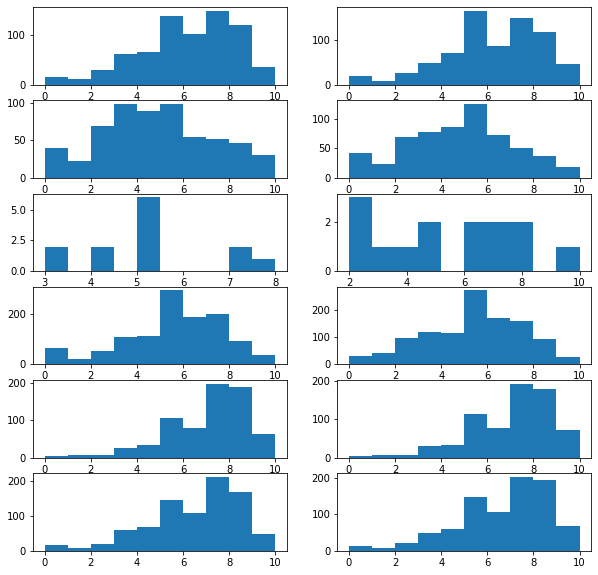

In [173]:
# Let's test for normality
plt.subplots(6, 2, figsize=(10, 10))
trust_ch = ess.loc[ess['cntry'] == 'CH']
trust_cz = ess.loc[ess['cntry'] == 'CZ']
trust_de = ess.loc[ess['cntry'] == 'DE']
trust_es = ess.loc[ess['cntry'] == 'ES']
trust_no = ess.loc[ess['cntry'] == 'NO']
trust_se = ess.loc[ess['cntry'] == 'SE']

plt.subplot(621)
plt.hist(trust_ch.loc[ess['year'] == 6].ppltrst)
plt.subplot(622)
plt.hist(trust_ch.loc[ess['year'] == 7].ppltrst)

plt.subplot(623)
plt.hist(trust_cz.loc[ess['year'] == 6].ppltrst)
plt.subplot(624)
plt.hist(trust_cz.loc[ess['year'] == 7].ppltrst)

plt.subplot(625)
plt.hist(trust_de.loc[ess['year'] == 6].ppltrst)
plt.subplot(626)
plt.hist(trust_de.loc[ess['year'] == 7].ppltrst)

plt.subplot(627)
plt.hist(trust_es.loc[ess['year'] == 6].ppltrst)
plt.subplot(628)
plt.hist(trust_es.loc[ess['year'] == 7].ppltrst)

plt.subplot(6, 2, 9)
plt.hist(trust_no.loc[ess['year'] == 6].ppltrst)
plt.subplot(6, 2, 10)
plt.hist(trust_no.loc[ess['year'] == 7].ppltrst)

plt.subplot(6, 2, 11)
plt.hist(trust_se.loc[ess['year'] == 6].ppltrst)
plt.subplot(6, 2, 12)
plt.hist(trust_se.loc[ess['year'] == 7].ppltrst)

plt.show()

They all look pretty normal with the exception of the Germany data which for whatever reason has a very small sample size. So we will use ANOVA to parametrically determine whether the difference between 2016 and 2018 are significantly different for all the countries except Germany. But since there are only 14 datapoints, it will be difficult to tell if the distribution will resemble a normal one (it seems likely from the other countries' data distribution) and any difference between the two group means will most likely be due to the randomness in the data.

In [229]:
# t-test for each country data from 2012 and 2014 as related samples
#print(trust_ch['ppltrst'].loc[trust_ch['year'] == 6].mean())
#print(trust_ch['ppltrst'].loc[trust_ch['year'] == 7].mean())

def do_rel_ttest(country, column):
    
    abbrev = {'Switzerland'   : 'CH',
              'Czech_Republic': 'CZ',
              'Germany'       : 'DE',
              'Spain'         : 'ES',
              'Norway'        : 'NO',
              'Sweden'        : 'SE'}
    
    country_data = ess.loc[ess['cntry'] == abbrev[country]]
    #print(country_data)
    
    metric_12 = country_data[column].loc[country_data['year'] == 6].dropna()
    metric_14 = country_data[column].loc[country_data['year'] == 7].dropna()
    
    test_rows = min(len(metric_12), len(metric_14))
    print(test_rows)
    
    metric_12 = metric_12[:test_rows]
    metric_14 = metric_14[:test_rows]
    
    T, p = stats.ttest_rel(metric_12, metric_14)
    
    print('{}:\n t-stat: {}\n p-value: {}\n'.format(country, T, p))
    
do_rel_ttest('Switzerland', 'ppltrst')
do_rel_ttest('Czech_Republic', 'ppltrst')
do_rel_ttest('Germany', 'ppltrst')
do_rel_ttest('Spain', 'ppltrst')
do_rel_ttest('Norway', 'ppltrst')
do_rel_ttest('Sweden', 'ppltrst')


773
Switzerland:
 t-stat: -0.6586851756725737
 p-value: 0.5102943511301135

651
Czech_Republic:
 t-stat: -0.440219908609957
 p-value: 0.6599241894564367

14
Germany:
 t-stat: -0.18399501804849683
 p-value: 0.8568563797095805

1211
Spain:
 t-stat: 2.4899311620174567
 p-value: 0.012910195297604806

730
Norway:
 t-stat: 0.5372131705675822
 p-value: 0.5912843025869986

906
Sweden:
 t-stat: -2.084246978881489
 p-value: 0.03741765719366441



So it looks like out of the six countries, only two showed significant change in trust in people. Spanish respondents got more trusting, and Swedish got less trusting.

__2. Did people become happier from 2012 to 2014? Compute results fo each country in the sample.__

Looks like we are in luck! We can just reuse the function from earlier provided that the data is normal.

In [230]:
# first let's see how the happiness score fared overall between 2012 and 2014
happy_2012 = ess['happy'].loc[ess['year'] == 6].mean()
happy_2014 = ess['happy'].loc[ess['year'] == 7].mean()
print('2012: %0.2f\n2014: %0.2f' % (happy_2012, happy_2014))

2012: 7.72
2014: 7.67


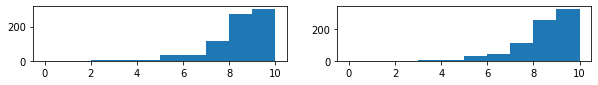

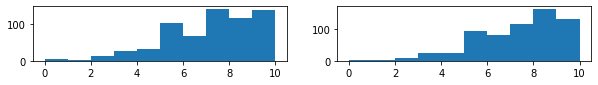

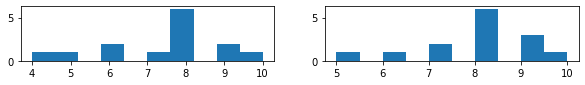

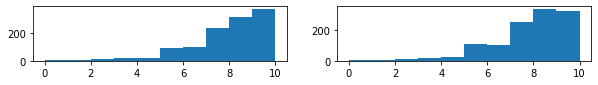

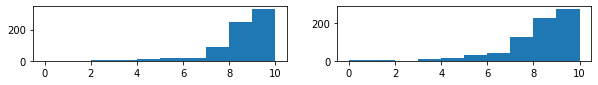

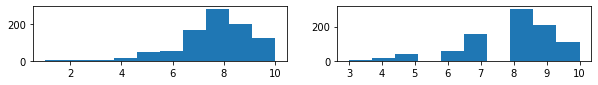

In [231]:
# visual check for normality
def plot_normal(country, column):
    
    abbrev = {'Switzerland'   : 'CH',
              'Czech_Republic': 'CZ',
              'Germany'       : 'DE',
              'Spain'         : 'ES',
              'Norway'        : 'NO',
              'Sweden'        : 'SE'}
    
    metric_2012 = ess['happy'].loc[(ess['cntry'] == abbrev[country]) & (ess['year'] == 6)].dropna()
    metric_2014 = ess['happy'].loc[(ess['cntry'] == abbrev[country]) & (ess['year'] == 7)].dropna()

    plt.subplots(1, 2, figsize=(10, 1))
    plt.subplot(121)
    plt.hist(metric_2012)
    plt.subplot(122)
    plt.hist(metric_2014)
    plt.show()
    
    
plot_normal('Switzerland', 'happy')
plot_normal('Czech_Republic', 'happy')
plot_normal('Germany', 'happy')
plot_normal('Spain', 'happy')
plot_normal('Norway', 'happy')
plot_normal('Sweden', 'happy')

Ahh, most decidedly non-normal. Let's tweak the function to perform non-parametric tests on these dependent samples. Except for Germany and Sweden.

In [232]:
# function to test variance
def test_non_para(country, column):
    
    abbrev = {'Switzerland'   : 'CH',
              'Czech_Republic': 'CZ',
              'Germany'       : 'DE',
              'Spain'         : 'ES',
              'Norway'        : 'NO',
              'Sweden'        : 'SE'}
    
    # group data by country
    df = ess.loc[ess['cntry'] == abbrev[country]].dropna()
    
    # rank data
    df[column + '_rank'] = stats.rankdata(df['happy'])
    
    metric_12 = df[column + '_rank'].loc[df['year'] == 6]
    metric_14 = df[column + '_rank'].loc[df['year'] == 7]
    
    test_rows = min(len(metric_12), len(metric_14))
    #print(test_rows)
    
    metric_12 = metric_12[:test_rows]
    metric_14 = metric_14[:test_rows]
    
    H, p = stats.kruskal(metric_12, metric_14)
        
    print('{}:\n H-stat: {}\n p-value: {}\n'.format(country, H, p))

In [233]:
test_non_para('Switzerland', 'happy')
test_non_para('Czech_Republic', 'happy')
test_non_para('Germany', 'happy')
test_non_para('Spain', 'happy')
test_non_para('Norway', 'happy')
test_non_para('Sweden', 'happy')

Switzerland:
 H-stat: 0.7821046117351174
 p-value: 0.3764982466188457

Czech_Republic:
 H-stat: 0.6785590415675314
 p-value: 0.4100833549575241

Germany:
 H-stat: 0.4578754578754809
 p-value: 0.4986185580950411

Spain:
 H-stat: 3.0412473602384447
 p-value: 0.08117352096431373

Norway:
 H-stat: 17.41408038100125
 p-value: 3.0059100145358804e-05

Sweden:
 H-stat: 0.07945680214001244
 p-value: 0.7780348894383852



The Norwegians are the only respondents who became significantly happier. I would be interested to find out what happened in those two years.

__3. Who reported watching more TV in 2012, men or women?__

Avg TV time reported by men: 3.8592303945445687
Avg TV time reported by women: 3.9053518334985133


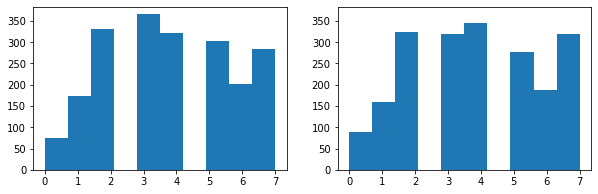

In [246]:
# get 2012 data
df_2012 = ess.loc[ess['year'] == 6].dropna()
men_tv = df_2012['tvtot'].loc[df_2012['gndr'] == 1]
women_tv = df_2012['tvtot'].loc[df_2012['gndr'] == 2]
print('Avg TV time reported by men: {}'.format(men_tv.mean()))
print('Avg TV time reported by women: {}'.format(women_tv.mean()))

plt.subplots(1, 2, figsize=(10, 3))
ax1 = plt.subplot(121, label='Men')
plt.hist(men_tv)
ax2 = plt.subplot(122, sharey=ax1)
plt.hist(women_tv)
plt.show()

Looking at the mean women do report slightly higher numbers, but let's see if that's because women just watch more tv. The histograms are not very pretty, but one would be hard pressed to argue that these plots are not normal. 

In [248]:
# let's test for significance
T, p = stats.ttest_ind(men_tv, women_tv)
print('T-stat: %0.4f\np-value: %0.4f' % (T, p))

T-stat: -0.7324
p-value: 0.4640


Nope.

__4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?__

In [249]:
# filter data
solo = df_2012['pplfair'].loc[df_2012['partner'] == 2]
couple = df_2012['pplfair'].loc[df_2012['partner'] == 1]
print('solo: {}\ncouple: {}'.format(solo.mean(), couple.mean()))

solo: 5.86592544146501
couple: 6.0743509047993705


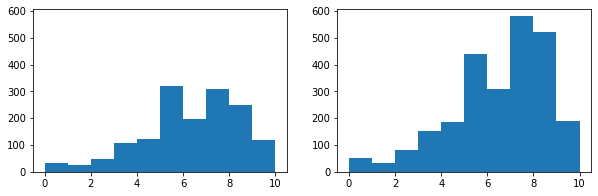

In [250]:
plt.subplots(1, 2, figsize=(10, 3))
ax1 = plt.subplot(121)
plt.hist(solo)
ax2 = plt.subplot(122, sharey=ax1)
plt.hist(couple)
plt.show()

That looks normal so let's test using independent t-test.

In [251]:
T, p = stats.ttest_ind(solo, couple)
print('T-stat: %0.4f\np-value: %0.4f' % (T, p))

T-stat: -3.0430
p-value: 0.0024


Very interesting. So more people who live with a partner do believe that people are fair than those who live alone. I wonder whether this has anything to do with the choice (or lack there of) of living alone. 

__5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?__

In [252]:
# let's first filter out 2014 data
df_2014 = ess.loc[ess['year'] == 7].dropna()
df_2014.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
773,CH,5.0,7,2.0,8.0,9.0,7.0,9.0,6.0,4.0,1.0,69.0,1.0
774,CH,25.0,7,4.0,4.0,2.0,5.0,6.0,5.0,3.0,1.0,30.0,1.0
775,CH,26.0,7,3.0,8.0,8.0,6.0,8.0,7.0,5.0,2.0,49.0,2.0
776,CH,28.0,7,2.0,7.0,7.0,5.0,9.0,6.0,2.0,1.0,51.0,1.0
777,CH,29.0,7,2.0,4.0,7.0,0.0,8.0,6.0,2.0,2.0,32.0,2.0


In [253]:
# let's compare Switzerland, Spain, Norway, and Czech Republic
swiss = df_2014.loc[df_2014['cntry'] == 'CH']
spain = df_2014.loc[df_2014['cntry'] == 'ES']
norway = df_2014.loc[df_2014['cntry'] == 'NO']
czech = df_2014.loc[df_2014['cntry'] == 'CZ']

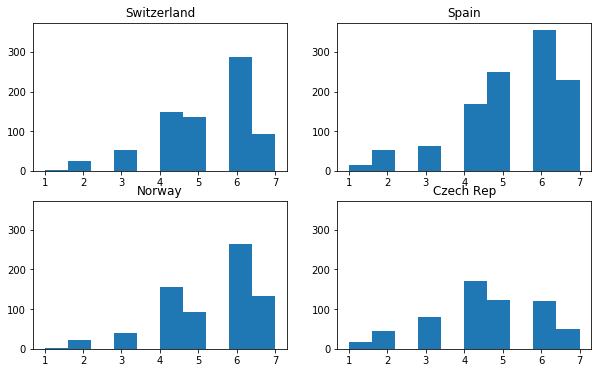

In [271]:
# visual check for normal distribution
f, ax = plt.subplots(2, 2, figsize=(10, 6))
ax1 = plt.subplot(221)
ax1.hist(swiss['sclmeet'])
ax1.set_title('Switzerland')

ax2 = plt.subplot(222, sharey=ax1)
ax2.hist(spain['sclmeet'])
ax2.set_title('Spain')

ax3 = plt.subplot(223, sharey=ax1)
ax3.hist(norway['sclmeet'])
ax3.set_title('Norway')

ax4 = plt.subplot(224, sharey=ax1)
ax4.hist(czech['sclmeet'])
ax4.set_title('Czech Rep')

plt.show()

In [283]:
print(swiss['sclmeet'].mean())
print(spain['sclmeet'].mean())
print(norway['sclmeet'].mean())
print(czech['sclmeet'].mean())

5.174966352624495
5.263668430335097
5.310393258426966
4.4950495049504955


In [286]:
# ANOVA
F, p = stats.f_oneway(swiss['sclmeet'], spain['sclmeet'], norway['sclmeet'], czech['sclmeet'])

print('F-stat: {}\np-value: {}'.format(F, p))

F-stat: 49.403422231165855
p-value: 3.3274228647786555e-31


In [289]:
# ttest to see if one stands out
print(stats.ttest_ind(swiss['sclmeet'], spain['sclmeet']))
print(stats.ttest_ind(swiss['sclmeet'], norway['sclmeet']))
print(stats.ttest_ind(swiss['sclmeet'], czech['sclmeet']))
print(stats.ttest_ind(spain['sclmeet'], norway['sclmeet']))
print(stats.ttest_ind(spain['sclmeet'], czech['sclmeet']))
print(stats.ttest_ind(norway['sclmeet'], czech['sclmeet']))

Ttest_indResult(statistic=-1.3563979158247432, pvalue=0.17513589623821907)
Ttest_indResult(statistic=-1.9524600649137105, pvalue=0.05107541004946689)
Ttest_indResult(statistic=8.998568888102158, pvalue=7.58694000913212e-19)
Ttest_indResult(statistic=-0.6968046493592841, pvalue=0.48601288469157433)
Ttest_indResult(statistic=10.538036641317998, pvalue=3.262659263756715e-25)
Ttest_indResult(statistic=10.507796823715257, pvalue=7.427021134307074e-25)


The pair-wise t-test shows that Czech Republic stands out among the four countries in showing significant difference in reporting social meetings. 

__6. Pick three or four of the countries in the sample and compare how often people took part in social acitivities, relative to other their age, in 2014. Are there differences, and if so, which countries stand out?__

In [290]:
# since we've found that the Spanish, Swiss and Norwegians are similarly social, let's try
# Norway, Sweden and Czech Republic this time.
norway = df_2014.loc[df_2014['cntry'] == 'NO']
swede = df_2014.loc[df_2014['cntry'] == 'SE']
czech = df_2014.loc[df_2014['cntry'] == 'CZ']

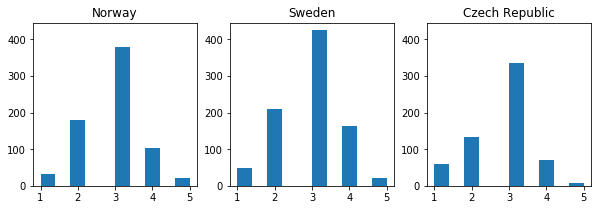

In [295]:
# visual check for normal distribution
f, ax = plt.subplots(1, 3, figsize=(10, 3))
ax1 = plt.subplot(131)
ax1.hist(norway['sclact'])
ax1.set_title('Norway')

ax2 = plt.subplot(132, sharey=ax1)
ax2.hist(swede['sclact'])
ax2.set_title('Sweden')

ax3 = plt.subplot(133, sharey=ax1)
ax3.hist(czech['sclact'])
ax3.set_title('Czech Republic')

plt.show()

In [296]:
# let's see some means
print(norway['sclact'].mean())
print(swede['sclact'].mean())
print(czech['sclact'].mean())

2.860955056179775
2.878892733564014
2.7293729372937294


In [298]:
# ANOVA
F, p = stats.f_oneway(norway['sclact'], swede['sclact'], czech['sclact'])

print('F-stat: {}\np-value: {}'.format(F, p))

F-stat: 6.249739980298673
p-value: 0.0019656989728481906


In [299]:
# pair-wise ttest
print(stats.ttest_ind(norway['sclact'], swede['sclact']))
print(stats.ttest_ind(norway['sclact'], czech['sclact']))
print(stats.ttest_ind(swede['sclact'], czech['sclact']))

Ttest_indResult(statistic=-0.42094459733257983, pvalue=0.6738528977365044)
Ttest_indResult(statistic=2.861670223005847, pvalue=0.004280825791403077)
Ttest_indResult(statistic=3.308051048995222, pvalue=0.0009621646490513099)
